# Libraries

In [336]:
# data collection and manipulation
import numpy as np
import pandas as pd
# random seed to get the same results from models
np.random.seed(42)
# feature scaling
from sklearn.preprocessing import RobustScaler
# Confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ML models:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Linear SVC
from sklearn.svm import LinearSVC
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
# AdaBoost with base Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# MLP Classifier
from sklearn.neural_network import MLPClassifier

# full-screen notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Loading the Data, EDA and Data Manipulation

You can download the dataset at https://www.kaggle.com/datasets/joebeachcapital/credit-card-fraud

In [98]:
# loading the data
df = pd.read_csv('creditcard_csv.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,'0'
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,'0'
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,'0'
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,'0'


In [99]:
# the dataset does not contain any missing values
# the data type for the target variable seems to be mismatched; currently it is object and we need it to be int64 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [100]:
# this function changes the data type of the target variable
def class_adj(class_):
    if class_ == "'0'":
        return 0
    elif class_ == "'1'":
        return 1
    else:
        pass

df['Class'] = df['Class'].apply(class_adj)

In [101]:
# we can see that some feature values are repeated, I will delete them from the model later
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [102]:
# the dataset is imbalanced, there are way fewer fraudulent transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [103]:
# we do not need the Time column because it is highly unlikely that time is a viable feature in this model, so we drop it
# the Amount column, however, could be indicative of fraud (although it is debatable)
df = df.drop(['Time'], axis = 1)

In [104]:
# let us drop all the duplicates from the sample
df = df.drop_duplicates()

In [105]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data Preprocessing and Train-Test-Validation Split

In [106]:
# randomize the rows so that the initial ordering does not influence the model fitting and evaluation processes
df = df.sample(frac = 1, random_state = 42).reset_index(drop = True)

In [164]:
# scaling the Amount column (contains ouliers, so we use RobustScaler)
df['Amount'] = RobustScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1))

In [165]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.190398,0.698232,1.396916,1.243184,0.063649,-0.053054,0.586590,0.039337,0.185185,-0.479029,...,-0.392453,-0.897569,0.202906,-0.025012,-0.804131,-1.011983,0.256706,0.216540,0.080560,0
1,-2.899712,1.147393,-0.379727,-2.019742,-0.850174,-0.542774,-0.282444,1.171072,-1.238802,1.035428,...,-0.278207,-0.533206,0.303149,-0.362806,0.292613,-0.614168,0.325406,-0.091687,0.343160,0
2,-5.900967,5.307300,-5.032880,-0.777607,-2.932475,-1.526561,-2.838857,4.269784,0.373968,1.193923,...,0.477784,0.987827,0.589001,-0.374808,0.011107,-0.148117,0.305026,0.321032,-0.310420,0
3,-1.079251,0.175778,1.951516,-1.261280,0.354781,-0.661683,0.373771,0.110145,-0.532230,-0.828617,...,0.005327,-0.294513,-0.116603,0.036575,0.178164,0.821761,-0.084983,0.048851,0.199429,0
4,1.211723,-1.048916,0.811722,-0.615885,-1.230005,0.314754,-1.137566,0.159100,-0.081684,0.428462,...,0.344109,0.943646,-0.206715,-0.405956,0.433022,0.008947,0.052303,0.029570,0.807227,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275658,-1.132021,0.785996,0.516518,-2.223989,-0.090699,-0.522912,0.224581,0.343205,0.289479,-1.213245,...,0.057761,0.042041,0.033195,-0.281401,-0.349446,-0.208484,-0.374049,0.045371,-0.200380,0
275659,-1.872531,-1.591997,-0.036535,-0.408596,3.977539,-0.684038,-0.523292,0.320294,-0.076457,-0.816108,...,0.510675,1.080921,0.019740,-1.724369,-0.058157,-0.073828,-0.052890,-0.020628,-0.178508,0
275660,1.193431,0.288382,0.173006,0.444899,0.085313,-0.076060,-0.061048,0.069629,-0.297069,-0.174738,...,-0.223037,-0.615727,0.098606,-0.332338,0.176756,0.125047,-0.007047,0.015192,-0.295612,0
275661,-1.823312,1.447214,0.322203,-0.255981,0.452673,-0.624741,0.866801,-0.569226,3.071378,1.013984,...,-0.578816,-0.478616,0.220143,0.013904,-0.704621,-0.162239,-0.003578,0.471758,-0.322375,0


In [186]:
# train-test-validation split (90%-5%-5% in this case)
train_ratio = 0.9
test_ratio = 0.05

as_np = df.to_numpy()
train_split = int(np.ceil(len(as_np) * train_ratio))
test_split = int(np.ceil(len(as_np) * test_ratio))
X_train, y_train = as_np[ : train_split, : -1], as_np[ : train_split, -1]
X_test, y_test = as_np[train_split : train_split + test_split, : -1], as_np[train_split : train_split + test_split, -1]
X_validation, y_validation = as_np[train_split + test_split : , : -1], as_np[train_split + test_split : , -1]

In [187]:
# checking the shape of the subsamples
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_validation.shape, y_validation.shape

((248097, 29), (248097,), (13784, 29), (13784,), (13782, 29), (13782,))

In [193]:
# checking the counts for all subsamples
np.unique(y_train, return_counts = True), np.unique(y_test, return_counts = True), np.unique(y_validation, return_counts = True)

((array([0., 1.]), array([247671,    426], dtype=int64)),
 (array([0., 1.]), array([13756,    28], dtype=int64)),
 (array([0., 1.]), array([13763,    19], dtype=int64)))

In [182]:
# checking if the number of observations in all subsamples is equal to the total sample size
X_train.shape[0] + X_test.shape[0] + X_validation.shape[0] == len(as_np)

True

# Model Evaluation 

In [352]:
# true positives over all positives in the sample
def recall(params):
    return params['TP'] / (params['FN'] + params['TP'])

# true negatives over all negatives in the sample
def specificity(params):
    return params['TN'] / (params['TN'] + params['FP'])

# true positives over all positives predicted by the model
def precision(params):
    return params['TP'] / (params['FP'] + params['TP'])

# true negatives over all negatives predicted by the model (Negative Predictive Value)
def NPV(params):
    return params['TN'] / (params['TN'] + params['FN'])

# model accuracy is a good metric if the target variable is well-balanced in the sample
def accuracy(params, balanced = False):
    if balanced:
        return (recall(params) + specificity(params)) / 2
    else:
        return (params['TN'] + params['TP']) / (params['TN'] + params['FP'] + params['FN'] + params['TP'])

# harmonic mean of recall and precision = 2 / (1/recall + 1/precision); serves the same purpose as balanced accuracy
def F_1(params):
    return 2 * precision(params) * recall(params) / (recall(params) + precision(params))

# all metrics at once
def model_metrics(params, printed = True):
    if printed:
        print(
            '''
Accuracy           {0}

Recall             {1}
Specificity        {2}

Precision          {3}
NPV                {4}

Balanced Accuracy  {5}
F-score            {6}
            '''.format(accuracy(params),
                       recall(params),
                       specificity(params),
                       precision(params),
                       NPV(params),
                       accuracy(params, balanced = True),
                       F_1(params))
        )
    else:
        return accuracy(params), recall(params), specificity(params), precision(params), NPV(params), accuracy(params, balanced = True), F_1(params)
    
def compare_models(params_list):
    results = pd.DataFrame([], columns = [f'Model {i + 1}' for i in range(len(params_list))],
                           index = ['Accuracy', 'Recall', 'Specificity', 'Precision', 'NPV', 'Balanced Accuracy', 'F-score'])
    for i in results.columns:
        results[i] = model_metrics(params_list[int(i[-1]) - 1], printed = False)
    return results

# Binary Classification Models

### Model 1: Logistic Regression

In [195]:
# creating the first model
model_1 = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
test_predictions_1 = model_1.predict(X_test)

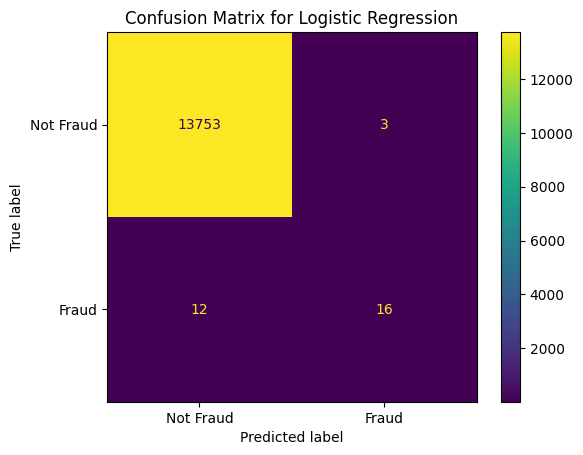

In [207]:
# confusion matrix
conf_matrix_1 = confusion_matrix(y_test, test_predictions_1, labels = [0, 1])
display_1 = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_1, display_labels = ['Not Fraud', 'Fraud'])
display_1.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [211]:
# model performance valuation
TN, FP, FN, TP = conf_matrix_1[0, 0], conf_matrix_1[0, 1], conf_matrix_1[1, 0], conf_matrix_1[1, 1]
params_1 = {
    'TN' : TN,
    'FP' : FP,
    'FN' : FN,
    'TP' : TP
}

model_metrics(params_1)


Accuracy           0.9989117817759722

Recall             0.5714285714285714
Specificity        0.9997819133469031

Precision          0.8421052631578947
NPV                0.9991282237559026

Balanced Accuracy  0.7856052423877373
F-score            0.6808510638297872
            


### Model 2: Linear SVC

In [222]:
model_2 = LinearSVC(max_iter = 100000).fit(X_train, y_train)
test_predictions_2 = model_2.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


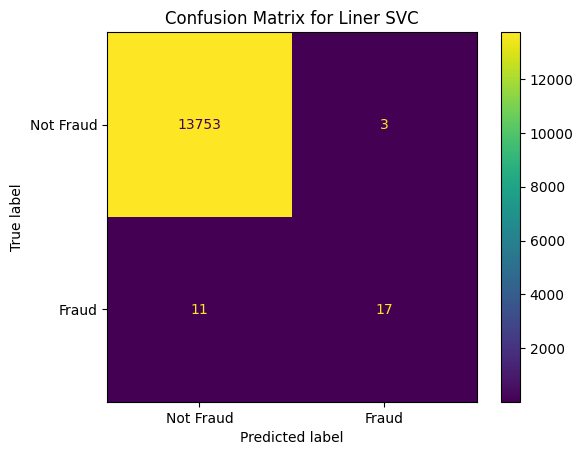

In [301]:
conf_matrix_2 = confusion_matrix(y_test, test_predictions_2, labels = [0, 1])
display_2 = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_2, display_labels = ['Not Fraud', 'Fraud'])
display_2.plot()
plt.title('Confusion Matrix for Liner SVC')
plt.show()

In [224]:
TN, FP, FN, TP = conf_matrix_2[0, 0], conf_matrix_2[0, 1], conf_matrix_2[1, 0], conf_matrix_2[1, 1]
params_2 = {
    'TN' : TN,
    'FP' : FP,
    'FN' : FN,
    'TP' : TP
}

model_metrics(params_2)


Accuracy           0.998984329657574

Recall             0.6071428571428571
Specificity        0.9997819133469031

Precision          0.85
NPV                0.9992008137169428

Balanced Accuracy  0.8034623852448801
F-score            0.7083333333333333
            


### Model 3: K-Nearest Neighbours

In [314]:
model_3 = KNeighborsClassifier().fit(X_train, y_train)
test_predictions_3 = model_3.predict(X_test)

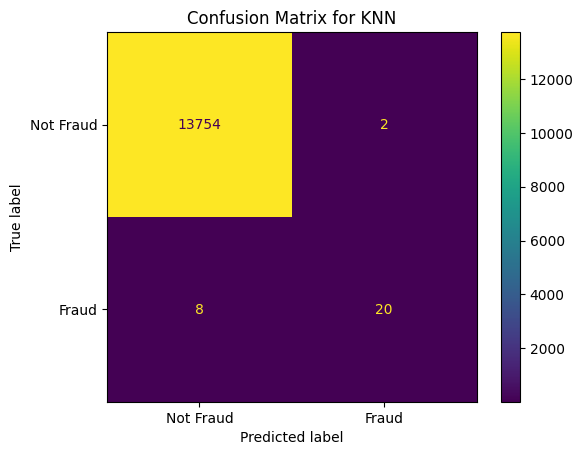

In [315]:
conf_matrix_3 = confusion_matrix(y_test, test_predictions_3, labels = [0, 1])
display_3 = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_3, display_labels = ['Not Fraud', 'Fraud'])
display_3.plot()
plt.title('Confusion Matrix for KNN')
plt.show()

In [316]:
TN, FP, FN, TP = conf_matrix_3[0, 0], conf_matrix_3[0, 1], conf_matrix_3[1, 0], conf_matrix_3[1, 1]
params_3 = {
    'TN' : TN,
    'FP' : FP,
    'FN' : FN,
    'TP' : TP
}

model_metrics(params_3)


Accuracy           0.9992745211839814

Recall             0.7142857142857143
Specificity        0.9998546088979354

Precision          0.9090909090909091
NPV                0.9994186891440198

Balanced Accuracy  0.8570701615918248
F-score            0.8
            


### Model 4: AdaBoost Classifier

In [332]:
# for this classifier we need to provide a base model first since it is an ensemble model
base_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 1)

# Warning! This model takes a very long time to compute
model_4 = AdaBoostClassifier(base_estimator = base_model, n_estimators = 100, learning_rate = 1).fit(X_train, y_train)
test_predictions_4 = model_4.predict(X_test)

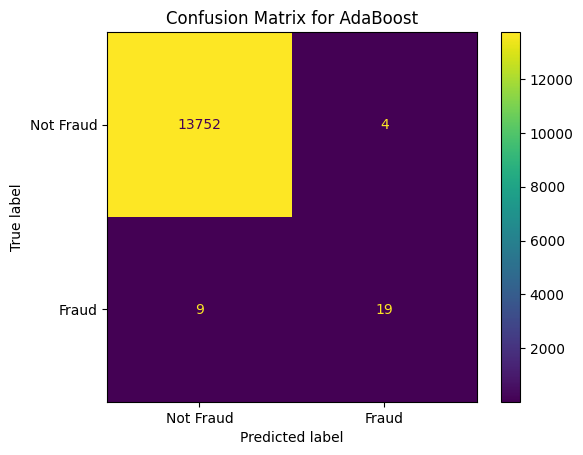

In [333]:
conf_matrix_4 = confusion_matrix(y_test, test_predictions_4, labels = [0, 1])
display_4 = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_4, display_labels = ['Not Fraud', 'Fraud'])
display_4.plot()
plt.title('Confusion Matrix for AdaBoost')
plt.show()

In [334]:
TN, FP, FN, TP = conf_matrix_4[0, 0], conf_matrix_4[0, 1], conf_matrix_4[1, 0], conf_matrix_4[1, 1]
params_4 = {
    'TN' : TN,
    'FP' : FP,
    'FN' : FN,
    'TP' : TP
}

model_metrics(params_4)


Accuracy           0.9990568775391758

Recall             0.6785714285714286
Specificity        0.9997092177958709

Precision          0.8260869565217391
NPV                0.999345977763244

Balanced Accuracy  0.8391403231836497
F-score            0.7450980392156864
            


### Model 5: Multi-layer Perceptron classifier

In [337]:
# Warning! This model takes a very long time to compute
model_5 = MLPClassifier(activation = 'logistic').fit(X_train, y_train)
test_predictions_5 = model_5.predict(X_test)

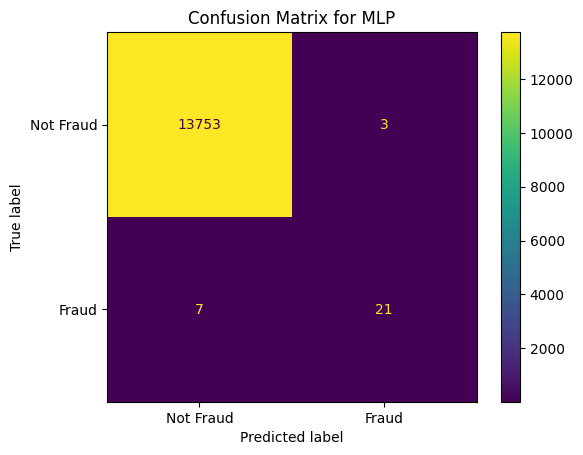

In [356]:
conf_matrix_5 = confusion_matrix(y_test, test_predictions_5, labels = [0, 1])
display_5 = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_5, display_labels = ['Not Fraud', 'Fraud'])
display_5.plot()
plt.title('Confusion Matrix for MLP')
plt.show()

In [341]:
TN, FP, FN, TP = conf_matrix_5[0, 0], conf_matrix_5[0, 1], conf_matrix_5[1, 0], conf_matrix_5[1, 1]
params_5 = {
    'TN' : TN,
    'FP' : FP,
    'FN' : FN,
    'TP' : TP
}

model_metrics(params_5)


Accuracy           0.9992745211839814

Recall             0.75
Specificity        0.9997819133469031

Precision          0.875
NPV                0.9994912790697674

Balanced Accuracy  0.8748909566734515
F-score            0.8076923076923077
            


# Comparing All Models

In [354]:
params_list = [params_1, params_2, params_3, params_4, params_5]
comparison = compare_models(params_list)

In [355]:
comparison

,Model 1,Model 2,Model 3,Model 4,Model 5
Accuracy,0.998912,0.998984,0.999275,0.999057,0.999275
Recall,0.571429,0.607143,0.714286,0.678571,0.750000
Specificity,0.999782,0.999782,0.999855,0.999709,0.999782
Precision,0.842105,0.850000,0.909091,0.826087,0.875000
NPV,0.999128,0.999201,0.999419,0.999346,0.999491
Balanced Accuracy,0.785605,0.803462,0.857070,0.839140,0.874891
F-score,0.680851,0.708333,0.800000,0.745098,0.807692


In [371]:
# ranking all metrics
comparison.rank(axis = 1, method = 'dense', ascending = False)

,Model 1,Model 2,Model 3,Model 4,Model 5
Accuracy,4.0,3.0,1.0,2.0,1.0
Recall,5.0,4.0,2.0,3.0,1.0
Specificity,2.0,2.0,1.0,3.0,2.0
Precision,4.0,3.0,1.0,5.0,2.0
NPV,5.0,4.0,2.0,3.0,1.0
Balanced Accuracy,5.0,4.0,2.0,3.0,1.0
F-score,5.0,4.0,2.0,3.0,1.0


The two best models without question are models 3 and 5. Model 3 is better at Specificity and Precision, whereas Model 5 is better at everything else. I believe that in this case there is a clear preference for high Recall and Balanced Accuracy / F-score since we wish to predict Fraud (Positive outcome) as well as possible, so model 5 is the best model here

# Final Model

I will now retrain the best model on the training and testing subsamples combined and evaluate its perfprmance on the validation subsample.

In [374]:
X_final, y_final = as_np[ : -X_validation.shape[0], : -1], as_np[ : -y_validation.shape[0], -1]

In [375]:
# checking data shapes
X_final.shape, y_final.shape, X_validation.shape, y_validation.shape

((261881, 29), (261881,), (13782, 29), (13782,))

In [376]:
# making sure the sample sizes are correct
X_final.shape[0] + X_validation.shape[0] == as_np.shape[0]

True

In [377]:
model_final = MLPClassifier(activation = 'logistic').fit(X_final, y_final)
predictions_final = model_final.predict(X_validation)

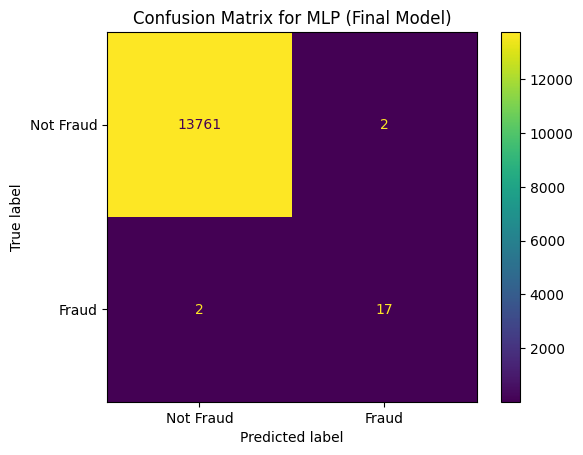

In [378]:
conf_matrix_final = confusion_matrix(y_validation, predictions_final, labels = [0, 1])
display_final = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_final, display_labels = ['Not Fraud', 'Fraud'])
display_final.plot()
plt.title('Confusion Matrix for MLP (Final Model)')
plt.show()

In [379]:
TN, FP, FN, TP = conf_matrix_final[0, 0], conf_matrix_final[0, 1], conf_matrix_final[1, 0], conf_matrix_final[1, 1]
params_final = {
    'TN' : TN,
    'FP' : FP,
    'FN' : FN,
    'TP' : TP
}

model_metrics(params_final)


Accuracy           0.9997097663619213

Recall             0.8947368421052632
Specificity        0.9998546828453099

Precision          0.8947368421052632
NPV                0.9998546828453099

Balanced Accuracy  0.9472957624752865
F-score            0.8947368421052632
            


### Conclusion: the model predicts the cases of fraud quite well with all metrics being above 85%